In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv("clus.csv")
df

,name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
df.columns

Index(['name', 'Age', 'Income'], dtype='object')

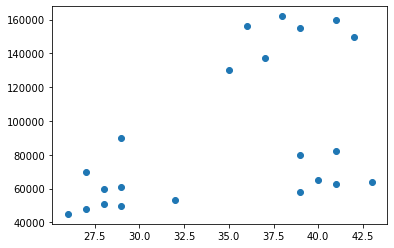

In [4]:
plt.scatter(df.Age,df.Income)

In [5]:
km=KMeans(n_clusters=3)

predict=km.fit_predict(df[['Age','Income']])
predict

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
df['cluster']=predict
df.head(7)

,name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0


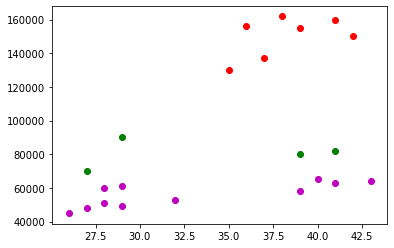

In [7]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]


plt.scatter(df0.Age,df0.Income,color="r")
plt.scatter(df1.Age,df1.Income,color="m")
plt.scatter(df2.Age,df2.Income,color="g")

In [8]:
#preprocessing

scale=MinMaxScaler()

scale.fit(df[['Age']])

df['age']=scale.transform(df[['Age']])

scale.fit(df[['Income']])

df['income']=scale.transform(df[['Income']])

In [9]:
df

,name,Age,Income,cluster,age,income
0,Rob,27,70000,2,0.058824,0.213675
1,Michael,29,90000,2,0.176471,0.384615
2,Mohan,29,61000,1,0.176471,0.136752
3,Ismail,28,60000,1,0.117647,0.128205
4,Kory,42,150000,0,0.941176,0.897436
5,Gautam,39,155000,0,0.764706,0.940171
6,David,41,160000,0,0.882353,0.982906
7,Andrea,38,162000,0,0.705882,1.000000
8,Brad,36,156000,0,0.588235,0.948718
9,Angelina,35,130000,0,0.529412,0.726496


In [10]:
km=KMeans(n_clusters=3)

predict=km.fit_predict(df[['age','income']])
predict
df['clus']=predict

In [11]:
df=df.drop(['name','Age','Income','cluster'],axis="columns")

In [12]:
df

,age,income,clus
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,0.948718,2
9,0.529412,0.726496,2


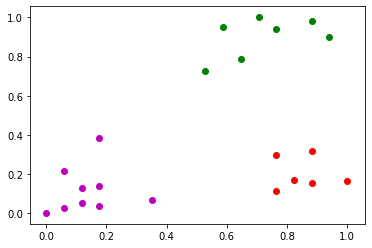

In [16]:
df0=df[df.clus==0]
df1=df[df.clus==1]
df2=df[df.clus==2]


plt.scatter(df0.age,df0.income,color="r")
plt.scatter(df1.age,df1.income,color="m")
plt.scatter(df2.age,df2.income,color="g")

In [17]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

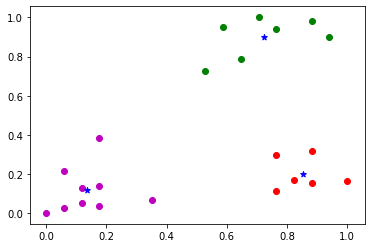

In [18]:
df0=df[df.clus==0]
df1=df[df.clus==1]
df2=df[df.clus==2]


plt.scatter(df0.age,df0.income,color="r")
plt.scatter(df1.age,df1.income,color="m")
plt.scatter(df2.age,df2.income,color="g")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="b",marker="*")

In [19]:
km.inertia_

0.4750783498553096

In [21]:
sse=[]

kr=range(1,10)

for k in kr:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

In [22]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.21878010893330446,
 0.16858512236029757,
 0.13706529523670866,
 0.10383752586603559]

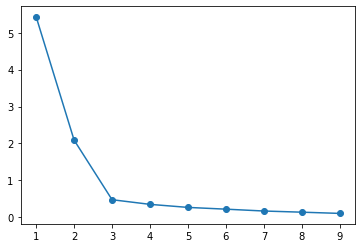

In [24]:
plt.scatter(kr,sse)
plt.plot(kr,sse)